### Goal

In [132]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [133]:
import os, sys
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt

import helper as hp

In [134]:
df = pd.read_excel("/Users/michaelmoret/Desktop/Externa/data/pulling/21-02-24/20240219-20.xlsx")
df.head(10)

,Test ID,Batch,Young's Modulus,Break Force,Distance to Break,Toughness,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,MPa/%,g,mm,kg/mm².%,NaN,NaN,NaN,NaN
1,NaN,NaN,Gradient St-Strain 1:2,Break Force,Distance to Break,Area St-Strain 1:3,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Start Batch 20240219_Bleached_NC_,20240219_Bleached_NC_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20240219_Bleached_NC_1,20240219_Bleached_NC_,37.24,74.631,-20.848,729.633,51.0,50.0,ok,7.0
5,20240219_Bleached_NC_2,20240219_Bleached_NC_,52.07,90.762,-21.762,985.639,51.0,51.0,be,7.0
6,20240219_Bleached_NC_3,20240219_Bleached_NC_,51.989,88.456,-22.336,931.487,55.0,52.0,be,7.0
7,20240219_Bleached_NC_4,20240219_Bleached_NC_,43.987,78.898,-23.572,850.776,51.0,53.0,be,7.0
8,20240219_Bleached_NC_5,20240219_Bleached_NC_,82.834,106.914,-2.107,93.058,69.0,70.0,sho,7.0
9,20240219_Bleached_NC_6,20240219_Bleached_NC_,53.607,54.244,-1.191,25.018,51.0,52.0,sho,7.0


In [135]:
df = df.rename(columns={'Unnamed: 6': 'Diameter 1', 
                        'Unnamed: 7': 'Diameter 2',
                        'Unnamed: 8': 'Note',
                        'Unnamed: 9': 'Humidity',})
df.head(2)

,Test ID,Batch,Young's Modulus,Break Force,Distance to Break,Toughness,Diameter 1,Diameter 2,Note,Humidity
0,NaN,NaN,MPa/%,g,mm,kg/mm².%,NaN,NaN,NaN,NaN
1,NaN,NaN,Gradient St-Strain 1:2,Break Force,Distance to Break,Area St-Strain 1:3,NaN,NaN,NaN,NaN


In [136]:
df = df.dropna()
df.head(2)

,Test ID,Batch,Young's Modulus,Break Force,Distance to Break,Toughness,Diameter 1,Diameter 2,Note,Humidity
4,20240219_Bleached_NC_1,20240219_Bleached_NC_,37.24,74.631,-20.848,729.633,51.0,50.0,ok,7.0
5,20240219_Bleached_NC_2,20240219_Bleached_NC_,52.07,90.762,-21.762,985.639,51.0,51.0,be,7.0


In [137]:
df['Break Force'] = df['Break Force'].astype(float)
df['Young\'s Modulus'] = df['Young\'s Modulus'].astype(float)
df['Distance to Break'] = df['Distance to Break'].astype(float)
df['Toughness'] = df['Toughness'].astype(float)
df['Diameter 1'] = df['Diameter 1'].astype(float)
df['Diameter 2'] = df['Diameter 2'].astype(float)
df['Humidity'] = df['Humidity'].astype(float)

df.head(2)

,Test ID,Batch,Young's Modulus,Break Force,Distance to Break,Toughness,Diameter 1,Diameter 2,Note,Humidity
4,20240219_Bleached_NC_1,20240219_Bleached_NC_,37.24,74.631,-20.848,729.633,51.0,50.0,ok,7.0
5,20240219_Bleached_NC_2,20240219_Bleached_NC_,52.07,90.762,-21.762,985.639,51.0,51.0,be,7.0


In [138]:
df = df[df['Test ID'] != 'Average:']
df = df[df['Test ID'] != 'S.D.']
df = df[df['Test ID'] != 'Coef. of Variation']

In [139]:
df['Average'] = ((df['Diameter 1'] + df['Diameter 2']) / 2 )/1000
df['Area'] = math.pi * (df['Average'] / 2)**2

In [140]:
df['Baseline area'] = math.pi * 0.035**2
df['Updated Young\'s Modulus'] = df['Young\'s Modulus'] * (df['Baseline area'] / df['Area'])

In [141]:
df['Break stress'] = df['Break Force'] / df['Area'] / 1000

In [142]:
df.head(2)

,Test ID,Batch,Young's Modulus,Break Force,Distance to Break,Toughness,Diameter 1,Diameter 2,Note,Humidity,Average,Area,Baseline area,Updated Young's Modulus,Break stress
4,20240219_Bleached_NC_1,20240219_Bleached_NC_,37.24,74.631,-20.848,729.633,51.0,50.0,ok,7.0,0.0505,0.002003,0.003848,71.552201,37.260324
5,20240219_Bleached_NC_2,20240219_Bleached_NC_,52.07,90.762,-21.762,985.639,51.0,51.0,be,7.0,0.0510,0.002043,0.003848,98.094195,44.429745


<Figure size 1000x600 with 0 Axes>

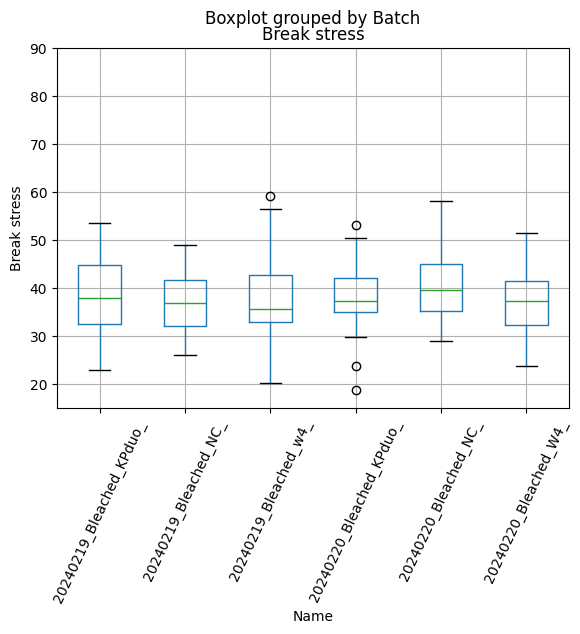

In [143]:
def do_plot(df):
    plt.figure(figsize=(10, 6))
    df.boxplot(column='Break stress', by='Batch')
    plt.xlabel('Name')
    plt.ylabel('Break stress')
    plt.xticks(rotation=65)
    # y axis from 20 to 90
    plt.ylim(15, 90)
    plt.show()
    

do_plot(df)


In [144]:
std_by_batch_all = df.groupby('Batch')['Break stress'].std()
print(std_by_batch_all)

Batch
20240219_Bleached_KPduo_    8.305677
20240219_Bleached_NC_       6.275853
20240219_Bleached_w4_       9.198364
20240220_Bleached_KPduo_    6.491879
20240220_Bleached_NC_       6.803218
20240220_Bleached_W4_       6.599442
Name: Break stress, dtype: float64


In [145]:
count = len(df[df['Batch'].str.contains('W4')])
print(count)

30


In [146]:
count = len(df[df['Batch'].str.contains('w4')])
print(count)

50


In [147]:
count = len(df[df['Batch'].str.contains('NC')])
print(count)

92


In [148]:
hp.get_pvalue_and_sample_size(df, 'Break stress')

(                          20240219_Bleached_NC_  20240220_Bleached_NC_  \
 20240219_Bleached_NC_                     1.000                  0.014   
 20240220_Bleached_NC_                     0.014                  1.000   
 20240219_Bleached_w4_                     0.860                  0.032   
 20240220_Bleached_W4_                     0.762                  0.074   
 20240219_Bleached_KPduo_                  0.350                  0.251   
 20240220_Bleached_KPduo_                  0.226                  0.176   
 
                           20240219_Bleached_w4_  20240220_Bleached_W4_  \
 20240219_Bleached_NC_                     0.860                  0.762   
 20240220_Bleached_NC_                     0.032                  0.074   
 20240219_Bleached_w4_                     1.000                  0.709   
 20240220_Bleached_W4_                     0.709                  1.000   
 20240219_Bleached_KPduo_                  0.383                  0.574   
 20240220_Bleached_KPdu

In [149]:
unique_values = df['Note'].unique()
print(unique_values)

['ok' 'be' 'sho' 'sho ' 'abe' 'idk' 'sho be' 'ABE' 'BE' 'Sho' 'SHO'
 'SHO, BE' 'be sho' 'BE, SHO' 'slip' 'be short' 'SLIP']


let's remove all but ok

In [150]:
len(df)

272

In [151]:
df = df[(df['Note'] == 'ok')]
len(df)

112

<Figure size 1000x600 with 0 Axes>

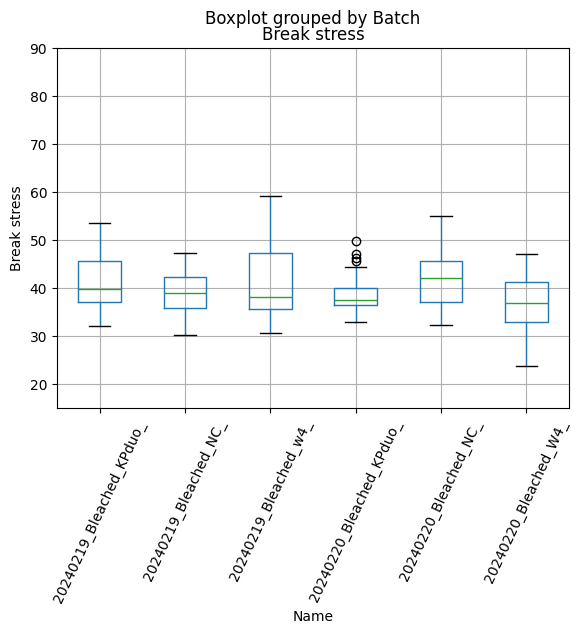

In [152]:
do_plot(df)

In [153]:
std_by_batch_ok = df.groupby('Batch')['Break stress'].std()
print(std_by_batch_ok)

Batch
20240219_Bleached_KPduo_    6.443252
20240219_Bleached_NC_       4.760870
20240219_Bleached_w4_       8.563653
20240220_Bleached_KPduo_    4.502538
20240220_Bleached_NC_       6.192555
20240220_Bleached_W4_       6.313178
Name: Break stress, dtype: float64


In [154]:
merged_df = pd.concat([std_by_batch_all, std_by_batch_ok], axis=1)
merged_df.columns = ['std all', 'std ok']
merged_df

,std all,std ok
Batch,,
20240219_Bleached_KPduo_,8.305677,6.443252
20240219_Bleached_NC_,6.275853,4.760870
20240219_Bleached_w4_,9.198364,8.563653
20240220_Bleached_KPduo_,6.491879,4.502538
20240220_Bleached_NC_,6.803218,6.192555
20240220_Bleached_W4_,6.599442,6.313178


In [155]:
count = len(df[df['Batch'].str.contains('W4')])
print(count)

15


In [156]:
count = len(df[df['Batch'].str.contains('w4')])
print(count)

18


In [157]:
count = len(df[df['Batch'].str.contains('NC')])
print(count)

36


In [158]:
hp.get_pvalue_and_sample_size(df, 'Break stress')

(                          20240219_Bleached_NC_  20240220_Bleached_NC_  \
 20240219_Bleached_NC_                     1.000                  0.110   
 20240220_Bleached_NC_                     0.110                  1.000   
 20240219_Bleached_w4_                     0.457                  0.764   
 20240220_Bleached_W4_                     0.396                  0.034   
 20240219_Bleached_KPduo_                  0.283                  0.755   
 20240220_Bleached_KPduo_                  0.725                  0.172   
 
                           20240219_Bleached_w4_  20240220_Bleached_W4_  \
 20240219_Bleached_NC_                     0.457                  0.396   
 20240220_Bleached_NC_                     0.764                  0.034   
 20240219_Bleached_w4_                     1.000                  0.143   
 20240220_Bleached_W4_                     0.143                  1.000   
 20240219_Bleached_KPduo_                  0.860                  0.070   
 20240220_Bleached_KPdu